In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

In [2]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/graphcodebert-base")
# Initialize empty lists to store the extracted data
groundTruth = []
mockTruth = []
groundDifference = []
mockDifference = []
ntok = []

# Open the text file for reading
with open('store.txt', 'r') as file:
    lines = file.readlines()

# Initialize variables to store the temporary data
current_ground_truth = ""
current_mock_truth = ""
current_ground_difference = None
current_mock_difference = None

# Iterate over each line in the file
for i in range(len(lines)):
    line = lines[i].strip()

    # Check if the line starts with "Ground truth:"
    if line.startswith("Ground truth:"):
        current_ground_truth = line.split("Ground truth:")[1].strip()
    # Check if the line starts with "Mock truth:"
    elif line.startswith("Mock truth:"):
        current_mock_truth = line.split("Mock truth:")[1].strip()
    # Check if the line starts with "Net % difference:"
    elif line.startswith("Net % difference:"):
        # Extract the value from the next line within a tensor
        tensor_line = lines[i + 1].strip()
        current_ground_difference = float(tensor_line.split("tensor(")[1].split(",")[0])
    # Check if the line starts with "Mock Net % difference:"
    elif line.startswith("Mock Net % difference:"):
        # Extract the value from the next line within a tensor
        tensor_line = lines[i + 1].strip()
        current_mock_difference = float(tensor_line.split("tensor(")[1].split(",")[0])
        # Append the extracted data to the lists
        nt = len(tokenizer.tokenize(current_ground_truth))
        groundTruth.append(current_ground_truth)
        mockTruth.append(current_mock_truth)
        groundDifference.append(current_ground_difference)
        mockDifference.append(current_mock_difference)
        ntok.append(nt)

# Now, the four lists are populated with the extracted data


In [3]:
data = {
    'GroundTruth': groundTruth,
    'MockTruth': mockTruth,
    'GroundDifference': groundDifference,
    'MockDifference': mockDifference,
    'NumTokens':ntok
}

# Create a DataFrame
df = pd.DataFrame(data)

In [4]:
df

,GroundTruth,MockTruth,GroundDifference,MockDifference,NumTokens
0,,,-72.2109,20.3338,0
1,actionContextRegistry,transactionProcessingStatus,-99.8300,13.5385,4
2,workerPoolsBuilder,userAuthenticationTokenKey,-80.1683,19.0041,4


In [ ]:
df.to_csv('testRes.csv',index=False)

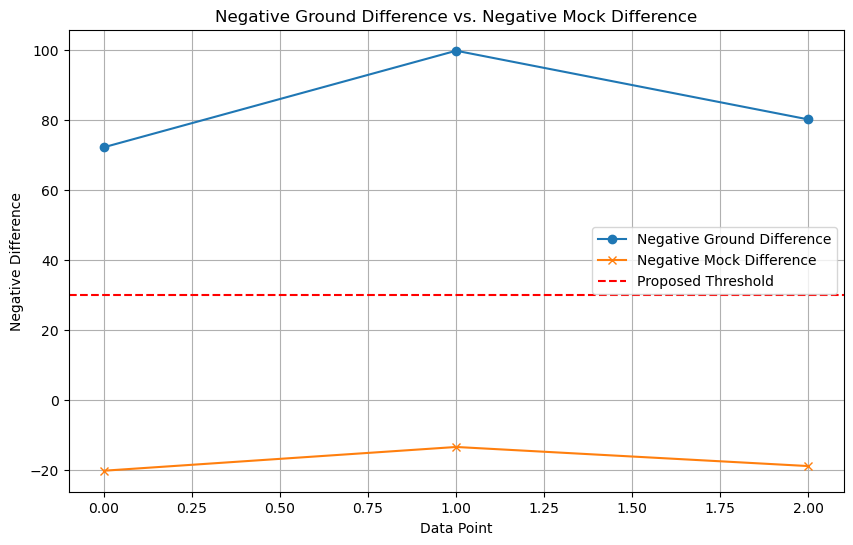

In [5]:
df['NegativeGroundDifference'] = -df['GroundDifference']
df['NegativeMockDifference'] = -df['MockDifference']

# Plot the two columns on the same graph
plt.figure(figsize=(10, 6))
plt.plot(df['NegativeGroundDifference'], label='Negative Ground Difference', marker='o')
plt.plot(df['NegativeMockDifference'], label='Negative Mock Difference', marker='x')

# Add a horizontal line at y=30 with the label "Threshold"
plt.axhline(y=30, color='r', linestyle='--', label='Proposed Threshold')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Negative Difference')
plt.title('Negative Ground Difference vs. Negative Mock Difference')

# Show a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

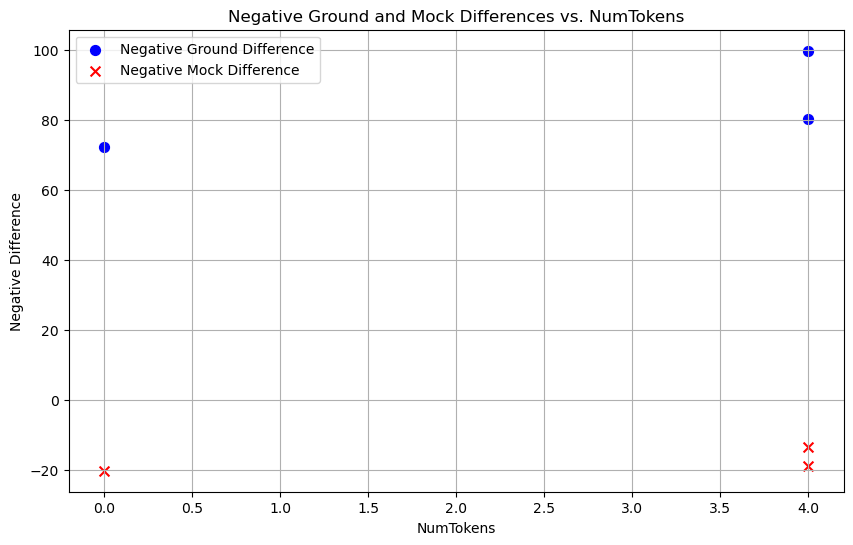

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['NumTokens'], -df['GroundDifference'], label='Negative Ground Difference', marker='o', s=50, c='blue')
plt.scatter(df['NumTokens'], -df['MockDifference'], label='Negative Mock Difference', marker='x', s=50, c='red')

# Set labels and title
plt.xlabel('NumTokens')
plt.ylabel('Negative Difference')
plt.title('Negative Ground and Mock Differences vs. NumTokens')

# Show a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()